# Lab 4b: Data Cleaning and Analysis

Welcome to Lab 4b!

This lab is a more free-form challenge than the previous ones you have completed. What I would like you to do is to demonstrate some of what you have learned in the previous exercises with another dataset.

<img src="images/london2012.gif"/>

First, by running the cell below we can display a sample of 25 rows from a CSV file containing records about athletes who competed in the London 2012 Olympics. This is a data set produced summarizing data prepared by the Guardian newspaper originally found [here](https://docs.google.com/spreadsheets/d/1CKSOQcrPDhxniv-V1FVFAo2rVXrguBCOFAsGZ_IwPJo/edit#gid=0).

#@Author: Jonas Örnfelt

In [1]:
import pandas as pd
#pd.read_csv('https://raw.githubusercontent.com/djcomlab/olympics-graphs/master/london2012-olympics-v3.csv').sample(25)

In [2]:
olympics_df = pd.read_csv('https://raw.githubusercontent.com/djcomlab/olympics-graphs/master/london2012-olympics-v3.csv')
# Create copy of dataset
raw_olympics_df = olympics_df.copy()
olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN
1,Jai Bhagwan,India,27,NaN,NaN,M,05/11/1985,Boxing,Men's Light (60kg),NaN,NaN,NaN,NaN
2,Manoj Kumar,India,25,NaN,NaN,M,12/10/1986,Boxing,Men's Light Welter (64kg),NaN,NaN,NaN,NaN
3,Vijender,India,26,NaN,NaN,M,10/29/1985,Boxing,Men's Middle (75kg),NaN,NaN,NaN,NaN
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN


In [3]:
# How many rows are in this data set? ✔
amount_of_rows = olympics_df.shape[0]
amount_of_rows

10422

In [4]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           10422 non-null  object 
 1   Country        10422 non-null  object 
 2   Age            10422 non-null  int64  
 3   Height (cm)    9861 non-null   float64
 4   Weight (kg)    9136 non-null   float64
 5   Sex            10422 non-null  object 
 6   Date of birth  10422 non-null  object 
 7   Sport          10421 non-null  object 
 8   Event          10421 non-null  object 
 9   Medal winner?  1027 non-null   object 
 10  Gold           338 non-null    object 
 11  Silver         355 non-null    object 
 12  Bronze         406 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [5]:
olympics_df.describe()

,Age,Height (cm),Weight (kg),Bronze
count,10422.000000,9861.000000,9136.000000,406.000000
mean,26.064863,176.885813,72.845884,0.686345
std,5.436800,11.292207,16.078648,0.390414
min,13.000000,132.000000,36.000000,0.076000
25%,22.000000,169.000000,61.000000,0.250000
50%,25.000000,176.000000,70.000000,1.000000
75%,29.000000,185.000000,81.000000,1.000000
max,71.000000,221.000000,218.000000,2.000000


In [6]:
# Remove incomlete rows

# Drop duplicates since they impact the analysis. 
olympics_df.drop_duplicates(inplace = True) 

# Also remove ID and other since they won't assist in the analysis
# olympics_df.drop(columns = ['ID', 'other'], inplace = True)

num_cols = olympics_df.select_dtypes(['int64', 'float64']).columns.tolist()
obj_cols = olympics_df.select_dtypes('O').columns.tolist()

# Print unique values
for i in obj_cols:
    print(i, ':', olympics_df[i].nunique())

Name : 10402
Country : 205
Sex : 2
Date of birth : 5384
Sport : 43
Event : 773
Medal winner? : 3
Gold : 15
Silver : 14


In [7]:
# One way of identifying the columns containing null values
nan_values = olympics_df.isna()
nan_columns = nan_values.any()

columns_with_nan = olympics_df.columns[nan_columns].tolist()
print(columns_with_nan)

['Height (cm)', 'Weight (kg)', 'Sport', 'Event', 'Medal winner?', 'Gold', 'Silver', 'Bronze']


In [8]:
# Investigate missing data
# Function for printing table of percentage of missing data in dataframe
def get_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total', '% Missing'])

get_missing(olympics_df)

,Total,% Missing
Gold,10084,96.76
Silver,10067,96.59
Bronze,10016,96.10
Medal winner?,9395,90.15
Weight (kg),1286,12.34
Height (cm),561,5.38
Sport,1,0.01
Event,1,0.01
Name,0,0.00
Country,0,0.00


In [9]:
# Remove incomlete rows ✔
""" 
Because not every person who plays the game / sport will win, the medals can stay like they are in the dataset.
However, there are also empty columns for height, weight, and 1 for sport and event
Let's disregard the high number of missing values in the height and weight features since we will still have a dataset with sufficient numbers of observations for the analysis. 
"""
olympics_df.dropna(subset = ['Weight (kg)', 'Height (cm)', 'Sport', 'Event'], inplace = True)
get_missing(olympics_df)

,Total,% Missing
Gold,8766,96.66
Silver,8752,96.50
Bronze,8719,96.14
Medal winner?,8159,89.97
Name,0,0.00
Country,0,0.00
Age,0,0.00
Height (cm),0,0.00
Weight (kg),0,0.00
Sex,0,0.00


In [10]:
print(olympics_df.isnull().any())
# How many rows remain after your filters are applied? ✔
print(f"\nAmount of rows: {olympics_df.shape[0]}")

Name             False
Country          False
Age              False
Height (cm)      False
Weight (kg)      False
Sex              False
Date of birth    False
Sport            False
Event            False
Medal winner?     True
Gold              True
Silver            True
Bronze            True
dtype: bool

Amount of rows: 9069


In [11]:
# We can create age groups and assign the players accordingly
age_groups = [0, 29, 45, 60, 100]
olympics_df['Age Group'] = pd.cut(olympics_df['Age'], bins = age_groups)
olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN,"(0, 29]"
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN,"(29, 45]"
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]"
6,Aaron Brown,Canada,20,198.0,79.0,M,5/27/1992,Athletics,Men's 200m,NaN,NaN,NaN,NaN,"(0, 29]"
7,Aaron Sarmiento,Spain,25,180.0,72.0,M,8/26/1986,Sailing,Men's 470,NaN,NaN,NaN,NaN,"(0, 29]"


In [12]:
# Create BMI feature
# Formula: BMI = Weight (kg) / Height (m) ** 2
olympics_df['bmi'] = olympics_df['Weight (kg)'] / ((olympics_df['Height (cm)'] / 100) ** 2)
olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN,"(0, 29]",22.675737
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN,"(29, 45]",33.557948
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]",20.438166
6,Aaron Brown,Canada,20,198.0,79.0,M,5/27/1992,Athletics,Men's 200m,NaN,NaN,NaN,NaN,"(0, 29]",20.151005
7,Aaron Sarmiento,Spain,25,180.0,72.0,M,8/26/1986,Sailing,Men's 470,NaN,NaN,NaN,NaN,"(0, 29]",22.222222


In [13]:
# Assign bmi groups based on personal bmi
import numpy as np

olympics_df['bmi group'] = np.where(olympics_df['bmi'] <= 18.5, 'Underweight',
                                    np.where(olympics_df['bmi'] < 25, 'Average',
                                             np.where(olympics_df['bmi'] < 30, 'Overweight',
                                                      np.where(olympics_df['bmi'] >= 30, 'Obese', 'NA'))))

olympics_df.head()

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
0,Elaine,Brazil,29,168.0,64.0,F,11/01/1982,Football,Women's Football,NaN,NaN,NaN,NaN,"(0, 29]",22.675737,Average
4,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Athletics,Men's Hammer Throw,NaN,NaN,NaN,NaN,"(29, 45]",33.557948,Obese
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]",20.438166,Average
6,Aaron Brown,Canada,20,198.0,79.0,M,5/27/1992,Athletics,Men's 200m,NaN,NaN,NaN,NaN,"(0, 29]",20.151005,Average
7,Aaron Sarmiento,Spain,25,180.0,72.0,M,8/26/1986,Sailing,Men's 470,NaN,NaN,NaN,NaN,"(0, 29]",22.222222,Average


In [14]:
# Finally, calculate the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index)
# for each athlete in the data set, and display the top 10 rows for male athletes, and again for female athletes. ✔

# One way to do it...
#bmi_df = olympics_df.groupby('Sex')["bmi"].nlargest(10)
#bmi_df

# Sort by bmi and loc specific genders
# Bmi can be sorted with ascending or not...
bmi_df = olympics_df.sort_values("bmi", ascending=True)
bmi_df_male = bmi_df.loc[bmi_df["Sex"] == 'M'].round(2)
bmi_df_female = bmi_df.loc[bmi_df["Sex"] == 'F'].round(2)
# Top ten male 
bmi_df_male[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
6006,Marcin Mozdzonek,Poland,27,211.0,51.0,M,02/09/1985,Volleyball,Men's Volleyball,NaN,NaN,NaN,NaN,"(0, 29]",11.46,Underweight
2829,Ercument Olgundeniz,Turkey,36,198.0,50.0,M,07/07/1976,Athletics,Men's Discus Throw,NaN,NaN,NaN,NaN,"(29, 45]",12.75,Underweight
1982,Cristian Tello,Spain,20,180.0,43.0,M,08/11/1991,Football,Men's Football,NaN,NaN,NaN,NaN,"(0, 29]",13.27,Underweight
2913,Etienne Lalonde Turbide,Canada,23,195.0,59.0,M,05/12/1989,Fencing,Men's Individual Foil,NaN,NaN,NaN,NaN,"(0, 29]",15.52,Underweight
9444,Tim Lips,Netherlands,26,180.0,52.0,M,10/07/1985,Equestrian,Individual Eventing; Team Eventing; ONCARLOS,NaN,NaN,NaN,NaN,"(0, 29]",16.05,Underweight
5352,Kyriakos Ioannou,Cyprus,28,193.0,60.0,M,7/26/1984,Athletics,Men's High Jump,NaN,NaN,NaN,NaN,"(0, 29]",16.11,Underweight
3172,Franck de Almeida,Brazil,29,173.0,49.0,M,02/06/1983,Athletics,Men's Marathon,NaN,NaN,NaN,NaN,"(0, 29]",16.37,Underweight
10223,Yuan Cao,People's Republic of China,17,160.0,42.0,M,02/07/1995,Diving,Men's Synchronised 10m Platform,YES,0.5,NaN,NaN,"(0, 29]",16.41,Underweight
4124,Jake Kaminski,United States of America,23,208.0,71.0,M,08/11/1988,Archery,Men's Individual; Men's Team,YES,NaN,0.33,NaN,"(0, 29]",16.41,Underweight
6836,Mohammed Ahmed,Canada,21,190.0,60.0,M,01/05/1991,Athletics,Men's 10;000m,NaN,NaN,NaN,NaN,"(0, 29]",16.62,Underweight


In [15]:
# Top ten rows from female ascending = True
bmi_df_female[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
2480,Doreen Amata,Nigeria,24,198.0,54.0,F,05/06/1988,Athletics,Women's High Jump,NaN,NaN,NaN,NaN,"(0, 29]",13.77,Underweight
4522,Joanna Lochowska,Poland,23,190.0,53.0,F,11/17/1988,Weightlifting,Women's 53kg,NaN,NaN,NaN,NaN,"(0, 29]",14.68,Underweight
9828,Vivian Jepkemoi Cheruiyot,Kenya,28,160.0,39.0,F,09/11/1983,Athletics,Women's 5000m; Women's 10;000m,YES,NaN,NaN,1.0,"(0, 29]",15.23,Underweight
7999,Rene Kalmer,South Africa,31,178.0,49.0,F,11/03/1980,Athletics,Women's Marathon,NaN,NaN,NaN,NaN,"(29, 45]",15.47,Underweight
5710,Luan Gabriel,Dominica,16,170.0,45.0,F,05/03/1996,Athletics,Women's 200m,NaN,NaN,NaN,NaN,"(0, 29]",15.57,Underweight
3541,Hanna Demydova,Ukraine,25,178.0,50.0,F,04/08/1987,Athletics,Women's Triple Jump,NaN,NaN,NaN,NaN,"(0, 29]",15.78,Underweight
844,Anna Incerti,Italy,32,168.0,45.0,F,1/19/1980,Athletics,Women's Marathon,NaN,NaN,NaN,NaN,"(29, 45]",15.94,Underweight
9919,Werknesh Kidane,Ethiopia,31,160.0,41.0,F,01/07/1981,Athletics,Women's 10;000m,NaN,NaN,NaN,NaN,"(29, 45]",16.02,Underweight
6565,Mhasin Fadlalla,Sudan,18,158.0,40.0,F,2/20/1994,Swimming,Women's 50m Freestyle,NaN,NaN,NaN,NaN,"(0, 29]",16.02,Underweight
3945,Irina Gordeeva,Russian Federation,25,185.0,55.0,F,10/09/1986,Athletics,Women's High Jump,NaN,NaN,NaN,NaN,"(0, 29]",16.07,Underweight


In [16]:
bmi_df_non_ascending = olympics_df.sort_values("bmi", ascending=False)
bmi_df_non_ascending_male = bmi_df_non_ascending.loc[bmi_df_non_ascending["Sex"] == 'M'].round(2)
bmi_df_non_ascending_female = bmi_df_non_ascending.loc[bmi_df_non_ascending["Sex"] == 'F'].round(2)
# Top ten rows male non ascending bmi
bmi_df_non_ascending_male[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
8024,Ricardo Blas Jr,Guam,25,185.0,218.0,M,10/19/1986,Judo,Men's +100kg,NaN,NaN,NaN,NaN,"(0, 29]",63.70,Obese
3803,Ian Warner,Canada,22,170.0,160.0,M,5/15/1990,Athletics,Men's 4 x 100m Relay,NaN,NaN,NaN,NaN,"(0, 29]",55.36,Obese
198,Akeem Haynes,Canada,20,168.0,150.0,M,03/11/1992,Athletics,Men's 4 x 100m Relay,NaN,NaN,NaN,NaN,"(0, 29]",53.15,Obese
4000,Itte Detenamo,Nauru,25,170.0,140.0,M,9/22/1986,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(0, 29]",48.44,Obese
8465,Sang-Guen Jeon,Republic of Korea,31,183.0,158.0,M,2/28/1981,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(29, 45]",47.18,Obese
7970,Reese Hoffa,United States of America,34,180.0,147.0,M,10/08/1977,Athletics,Men's Shot Put,YES,NaN,NaN,1.0,"(29, 45]",45.37,Obese
2045,Damon Kelly,Australia,28,182.0,149.0,M,12/01/1983,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(0, 29]",44.98,Obese
9705,Velichko Cholakov,Azerbaijan,30,198.0,170.0,M,01/12/1982,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(29, 45]",43.36,Obese
4226,Janusz Wojnarowicz,Poland,32,198.0,170.0,M,4/14/1980,Judo,Men's +100kg,NaN,NaN,NaN,NaN,"(29, 45]",43.36,Obese
5069,Kazuomi Ota,Japan,26,183.0,145.0,M,07/01/1986,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(0, 29]",43.30,Obese


In [17]:
# Top ten rows male non ascending bmi
bmi_df_non_ascending_female[:10]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
8991,Sparkle McKnight,Trinidad and Tobago,20,158.0,155.0,F,12/21/1991,Athletics,Women's 4 x 100m Relay,NaN,NaN,NaN,NaN,"(0, 29]",62.09,Obese
3704,Holley Mangold,United States of America,22,173.0,154.0,F,12/22/1989,Weightlifting,Women's +75kg,NaN,NaN,NaN,NaN,"(0, 29]",51.46,Obese
9680,Vanessa Zambotti,Mexico,30,175.0,145.0,F,03/04/1982,Judo,Women's +78kg,NaN,NaN,NaN,NaN,"(29, 45]",47.35,Obese
1901,Claudia Carolina Fajardo Rodriguez,Honduras,26,160.0,117.0,F,9/26/1985,Shooting,Women's 10m Air Pistol,NaN,NaN,NaN,NaN,"(0, 29]",45.70,Obese
5809,Lulu Zhou,People's Republic of China,24,175.0,131.0,F,19/03/1988,Weightlifting,Women's +75kg,YES,1,NaN,NaN,"(0, 29]",42.78,Obese
3467,Gulsah Kocaturk,Turkey,26,178.0,135.0,F,01/01/1986,Judo,Women's +78kg,NaN,NaN,NaN,NaN,"(0, 29]",42.61,Obese
9905,Wen Tong,People's Republic of China,29,180.0,130.0,F,01/02/1983,Judo,Women's +78kg,YES,NaN,NaN,1.0,"(0, 29]",40.12,Obese
9904,Wen-Hua Li,Taipei (Chinese Taipei),22,180.0,130.0,F,12/03/1989,Athletics,Women's Discus Throw,NaN,NaN,NaN,NaN,"(0, 29]",40.12,Obese
6569,Mi-Ran Jang,Republic of Korea,28,170.0,115.0,F,10/09/1983,Weightlifting,Women's +75kg,NaN,NaN,NaN,NaN,"(0, 29]",39.79,Obese
6941,Na-Young Kim,Republic of Korea,24,189.0,140.0,F,01/06/1988,Judo,Women's +78kg,NaN,NaN,NaN,NaN,"(0, 29]",39.19,Obese


In [18]:
# How many countries are present in the data set? ✔
# Count unique entries of countries to get number of countries that participated
print(f"Number of countries participated: {olympics_df['Country'].nunique()}")

Number of countries participated: 197


In [19]:
# We can see that some names appear several times since there's 9069 rows and 9053 unique names
print(f"Number of players participated: {olympics_df['Name'].nunique()}")

Number of players participated: 9053


In [20]:
# Which athlete competed in the most events? ✔
#name_counts = pd.DataFrame(olympics_df['Name'].value_counts())
name_counts_df = olympics_df["Name"].value_counts().rename_axis('Name').reset_index(name='Count')
name_counts_df = name_counts_df.sort_values(by=['Count'], ascending=False)

print(f"Athlete that competed in the most events: {name_counts_df.iloc[0]['Name']} who competed {name_counts_df.iloc[0]['Count']} time(s).")

Athlete that competed in the most events: Lei Zhang who competed 3 time(s).


In [21]:
# Count number of sports
print(f"Number of sports conducted: {olympics_df['Sport'].nunique()}")

Number of sports conducted: 37


In [22]:
# Interestingly, we see that one entry of YES in Medal Winner is actually "YEs" with a lowecase 's'...
print(f"Number of medals won:\n{olympics_df['Medal winner?'].dropna().value_counts()}")

Number of medals won:
YES    909
YEs      1
Name: Medal winner?, dtype: int64


In [23]:
# Which country fielded the most athletes? ✔
print(f"Countries with most atheletes:\n{olympics_df['Country'].value_counts()}")

#print(f"\nThe Country with most atheletes:\n {olympics_df['Country'].value_counts().index[0]}")
print(f"\nThe Country with most atheletes:\n{olympics_df['Country'].value_counts().idxmax()}")

Countries with most atheletes:
United States of America    492
Great Britain               484
Australia                   371
Russian Federation          370
Germany                     361
                           ... 
Tonga                         1
Botswana                      1
Sierra Leone                  1
Bolivia                       1
Mali                          1
Name: Country, Length: 197, dtype: int64

The Country with most atheletes:
United States of America


In [24]:
# What is the average age, height, and weight for each country's olympic teams? ✔

#countries = list(olympics_df['Country'].value_counts().index)
#countries
## This can be used to confirm the results from df below...
#for c in countries:
#  print(f"Country: {c}, average height: {np.average(olympics_df.loc[olympics_df['Country'] == c]['Height (cm)'])}")
#  print(f"average weight: {np.average(olympics_df.loc[olympics_df['Country'] == c]['Weight (kg)'])}, average age: {np.average(olympics_df.loc[olympics_df['Country'] == c]['Age'])}")

countries_df = olympics_df.groupby('Country').agg({'Age':np.average, 'Height (cm)':np.average, 'Weight (kg)':np.average})
countries_df = countries_df.round(2)
countries_df

,Age,Height (cm),Weight (kg)
Country,,,
Afghanistan,23.67,169.33,60.33
Albania,24.00,177.25,81.75
Algeria,24.59,174.59,66.76
American Samoa,20.25,173.25,77.00
Andorra,32.67,172.00,67.33
...,...,...,...
Vietnam,23.85,162.08,57.31
Virgin Islands (US),23.71,179.57,73.43
Yemen,19.00,171.00,58.00


In [25]:
# What is the average age, height, and weight for each country's olympic teams? ✔
# As per last question, but by Male and Female athletes. ✔
countries_df = olympics_df.groupby(['Country', 'Sex']).agg({'Age':np.average, 'Height (cm)':np.average, 'Weight (kg)':np.average})
countries_df = countries_df.round(2)
countries_df

Age  Height (cm)  Weight (kg)
Country     Sex                                 
Afghanistan F    23.00       160.00        52.00
            M    24.00       174.00        64.50
Albania     F    20.50       162.00        56.00
            M    25.17       182.33        90.33
Algeria     F    23.22       172.28        62.83
...                ...          ...          ...
Yemen       M    19.00       172.50        62.50
Zambia      F    17.00       180.00        70.00
            M    25.50       179.00        76.50
Zimbabwe    F    26.50       173.50        68.50
            M    27.25       175.00        69.25

[376 rows x 3 columns]

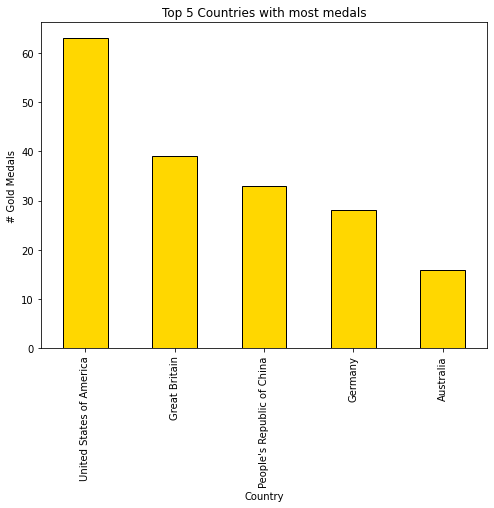

In [26]:
# Produce a medals table showing which countries gained the most of Gold, Silver and Bronze medals. ✔
import matplotlib.pyplot as plt

gold_medals = olympics_df.dropna(subset = ['Gold'])

plt.rcParams['figure.figsize'] = (8,6)
gold_medals['Country'].value_counts().nlargest(5).plot(kind = 'bar', linewidth = 1, facecolor = 'gold', edgecolor = 'k')
plt.title('Top 5 Countries with most medals')
plt.xlabel('Country')
plt.ylabel('# Gold Medals')
plt.show()

In [27]:
# Table style
gold_medals['Country'].value_counts()

United States of America                  63
Great Britain                             39
People's Republic of China                33
Germany                                   28
Australia                                 16
Republic of Korea                         14
Italy                                     12
Russian Federation                        10
France                                    10
Hungary                                   10
South Africa                               6
Ukraine                                    6
Kazakhstan                                 6
New Zealand                                5
Democratic People's Republic  of Korea     4
Belarus                                    4
Japan                                      4
Islamic Republic of Iran                   3
Netherlands                                3
Denmark                                    3
Switzerland                                2
Jamaica                                    2
Sweden    

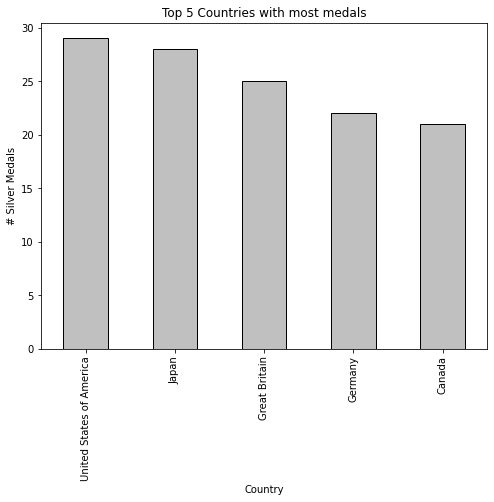

In [28]:
silver_medals = olympics_df.dropna(subset = ['Silver'])

plt.rcParams['figure.figsize'] = (8,6)
silver_medals['Country'].value_counts().nlargest(5).plot(kind = 'bar', linewidth = 1, facecolor = 'silver', edgecolor = 'k')
plt.title('Top 5 Countries with most medals')
plt.xlabel('Country')
plt.ylabel('# Silver Medals')
plt.show()

In [29]:
# Table style
silver_medals['Country'].value_counts()

United States of America      29
Japan                         28
Great Britain                 25
Germany                       22
Canada                        21
People's Republic of China    21
Australia                     21
Spain                         16
France                        15
Russian Federation            14
Netherlands                   10
Hungary                        8
Republic of Korea              7
Italy                          7
Romania                        6
Mexico                         5
Denmark                        5
Czech Republic                 4
Croatia                        3
Sweden                         3
Islamic Republic of Iran       3
Brazil                         3
Belarus                        3
Colombia                       3
New Zealand                    3
Azerbaijan                     2
Portugal                       2
Egypt                          2
Jamaica                        2
Finland                        1
Kenya     

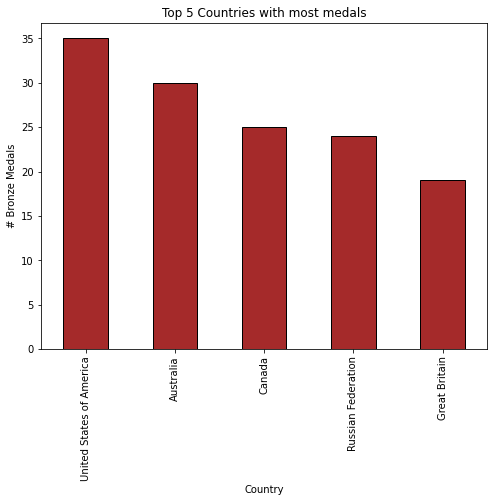

In [30]:
bronze_medals = olympics_df.dropna(subset = ['Bronze'])

plt.rcParams['figure.figsize'] = (8,6)
bronze_medals['Country'].value_counts().nlargest(5).plot(kind = 'bar', linewidth = 1, facecolor = 'brown', edgecolor = 'k')
plt.title('Top 5 Countries with most medals')
plt.xlabel('Country')
plt.ylabel('# Bronze Medals')
plt.show()

In [31]:
# Table style
bronze_medals['Country'].value_counts()

United States of America                  35
Australia                                 30
Canada                                    25
Russian Federation                        24
Great Britain                             19
People's Republic of China                17
Japan                                     17
Netherlands                               16
Germany                                   16
France                                    14
New Zealand                               13
Republic of Korea                          8
Poland                                     8
Denmark                                    8
Belarus                                    7
Brazil                                     7
Italy                                      7
Czech Republic                             6
Ukraine                                    4
Slovakia                                   4
Singapore                                  3
Greece                                     3
Slovenia  

## The Challenge

By adding your own code in your own Jupyter Notebook cells below (you can add a cell by pressing the `+` button in the toolbar), try and answer some of the following questions about this data set:
* How many rows are in this data set? ✔
* Apply some filtering to remove rows that might be incomplete or have errors. How many rows remain after your filters are applied? ✔
* How many atheletes are in the data set? ✔
* Which athlete competed in the most events? ✔
* How many countries are present in the data set? ✔
* Which country fielded the most athletes? ✔
* Produce a medals table showing which countries gained the most of Gold, Silver and Bronze medals. ✔
* What is the average age, height, and weight for each country's olympic teams? ✔
* As per last question, but by Male and Female athletes. ✔
* Finally, calculate the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) for each athlete in the data set, and display the top 10 rows for male athletes, and again for female athletes. ✔

If you comfortably work out answers for all of these, feel free to add your own analyses!

---
You're done with Lab 4b!

Choose **Save and Checkpoint** from the **File** menu to save your work.

If you are running the labs in Binder (on the cloud), then choose **Download as Notebook** and save it to your computer. 

Now *ZIP* all two Lab 4 notebooks together into one file and [upload it to Studium](https://uppsala.instructure.com/courses/26106/assignments/37618).

#NEW STUFF...
(not included in lab assignment)

In [35]:
# Which country has the best male - female ratio?
# Let's create a pivot table to see the count of players by gender in every region.
mf_ratio = pd.pivot_table(index = 'Country', columns = 'Sex', values = 'Name', data = olympics_df, aggfunc = 'nunique')
mf_ratio = mf_ratio.fillna(0)
mf_ratio.head(15)
mf_ratio = mf_ratio.head(15)

In [37]:
mf_ratio['MRatio'] = ((mf_ratio['M'] / mf_ratio['M'])  * 100).astype(int)
mf_ratio['FRatio'] = ((mf_ratio['F'] / mf_ratio['M'])  * 100).astype(int)
mf_ratio['Overall'] = round(mf_ratio['MRatio'] / mf_ratio['FRatio'], 2)

mf_ratio[(mf_ratio['Overall'] > 0.90) & (mf_ratio['Overall'] < 1.1)]

Sex,F,M,MRatio,FRatio,Overall
Country,,,,,


In [38]:
"""
These are the countries which have the M:F ratio almost equal to 1. Why are we looking for a value almost equal to 1? The value of 1 represents that the no. of males participated is equal to the no. of the females participated. As the value of 1 can't be obtained ideally, a buffer of -0.1 to 0.1 is chosen. Let's filter this with the countries which has sent more than 100 players as it makes more sense.
"""
mf_ratio.loc[((mf_ratio['Overall'] > 0.90) & (mf_ratio['Overall'] < 1.1) & (mf_ratio['M'] + mf_ratio['F'] > 100))].sort_values(by = 'Overall', ascending = False)


Sex,F,M,MRatio,FRatio,Overall
Country,,,,,


#https://medium.com/nerd-for-tech/data-exploration-of-historical-olympics-dataset-2d50a7d0611d

In [39]:
gender_counts = olympics_df.Sex.value_counts()
gender_counts

M    5027
F    4042
Name: Sex, dtype: int64

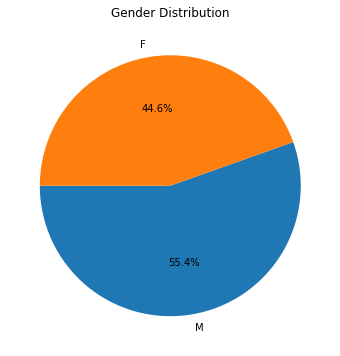

In [40]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [41]:
top_countries = olympics_df.Country.value_counts().sort_values(ascending=False).head(10)
top_countries

United States of America      492
Great Britain                 484
Australia                     371
Russian Federation            370
Germany                       361
People's Republic of China    313
France                        309
Japan                         263
Spain                         248
Canada                        245
Name: Country, dtype: int64

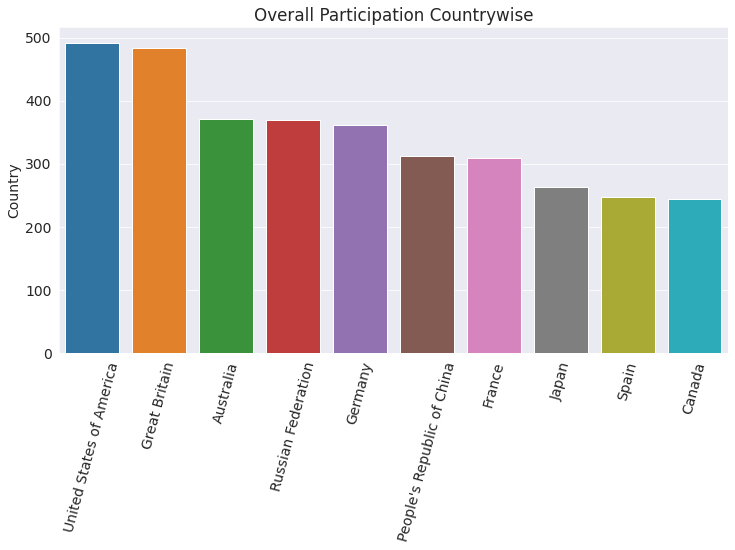

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Overall Participation Countrywise')
sns.barplot(x=top_countries.index, y=top_countries);

In [44]:
# Which countries WON the maximum Gold Medals...
team_list = olympics_df[(olympics_df.Gold != None)].Country
team_list.value_counts().head(10)

United States of America      492
Great Britain                 484
Australia                     371
Russian Federation            370
Germany                       361
People's Republic of China    313
France                        309
Japan                         263
Spain                         248
Canada                        245
Name: Country, dtype: int64

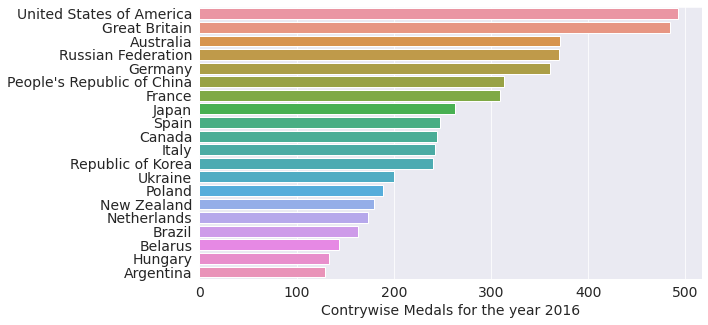

In [45]:
sns.barplot(x=team_list.value_counts().head(20), y=team_list.value_counts().head(20).index)
# plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Contrywise Medals for the year 2016');

In [49]:
# US seems to lead the Gold medal charts. I am curious to know which sport fetch the most gold medals.
US_Gold = olympics_df[(olympics_df.Gold != None) & (olympics_df.Country == 'United States of America')]
US_Gold = US_Gold[['Sport','Gold']].groupby('Sport').count()
US_Gold.reset_index(inplace=True)
Top_sports = US_Gold.sort_values('Gold', ascending=False)
Top_sports.head()

,Sport,Gold
21,Swimming,14
14,Football,11
26,Water Polo,11
18,Rowing,9
1,Athletics,7


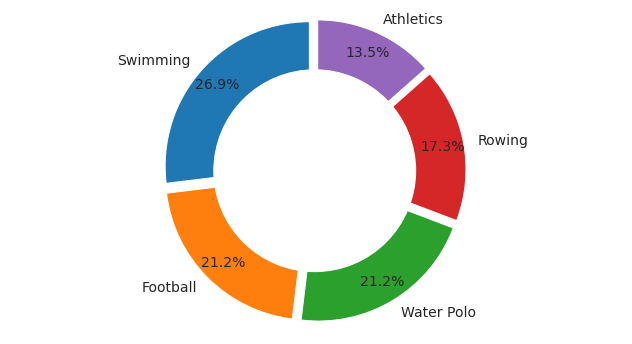

In [50]:
# It seems like Swimming fetched the maximum Gold medals to US. Below is the visual representation of the same.
fig1, ax1 = plt.subplots()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(Top_sports.head()['Gold'], colors = colors, labels= Top_sports.head()['Sport'], autopct='%1.1f%%', startangle=90
       , pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [64]:
df_medal_holders = olympics_df[(olympics_df["Medal winner?"] == 'YES') | (olympics_df["Medal winner?"] == 'YEs')]
df_medal_holders['Count_Of_Medals'] = 1
print(len(df_medal_holders))
df_medal_holders.head()

910


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group,Count_Of_Medals
5,A Lam Shin,Republic of Korea,25,167.0,57.0,F,9/23/1986,Fencing,Women's Individual Epee; Women's Team Epee,YES,NaN,0.5,NaN,"(0, 29]",20.438166,Average,1
13,Abby Wambach,United States of America,32,178.0,81.0,F,06/02/1980,Football,Women's Football,YES,0.09,NaN,NaN,"(29, 45]",25.564954,Overweight,1
14,Abdalaati Iguider,Morocco,25,173.0,57.0,M,3/25/1987,Athletics,Men's 1500m; Men's 5000m,YES,NaN,NaN,1.0,"(0, 29]",19.045073,Average,1
47,Abel Kiprop Mutai,Kenya,23,187.0,73.0,M,10/02/1988,Athletics,Men's 3000m Steeplechase,YES,NaN,NaN,1.0,"(0, 29]",20.875633,Average,1
51,Abigail Johnston,United States of America,22,165.0,61.0,F,11/16/1989,Diving,Women's Synchronised 3m Springboard,YES,NaN,0.5,NaN,"(0, 29]",22.405877,Average,1


In [66]:
df_highest_medals = df_medal_holders[['Name', 'Country', 'Count_Of_Medals']].groupby(['Name', 'Country']).sum().sort_values('Count_Of_Medals', ascending=False)

df_highest_medals = df_highest_medals.groupby(['Name','Country']).sum().sort_values('Count_Of_Medals', ascending=False).head(10)
df_highest_medals.reset_index(inplace=True)
df_highest_medals

,Name,Country,Count_Of_Medals
0,Anna Meares,Australia,2
1,Hao Wang,People's Republic of China,2
2,A Lam Shin,Republic of Korea,1
3,Nathan Adrian,United States of America,1
4,Nadzeya Papok,Belarus,1
5,Nahomi Kawasumi,Japan,1
6,Nan Zhang,People's Republic of China,1
7,Nasser Al-Attiya,Qatar,1
8,Natalia Vorobeva,Russian Federation,1
9,Natalie Dell,United States of America,1


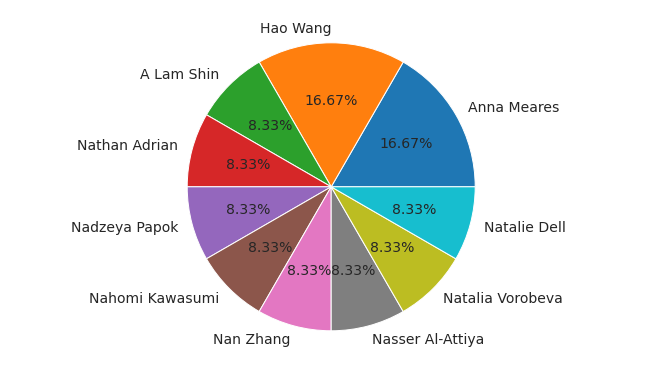

In [67]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Team = df_highest_medals.Name
Count_of_Medal = df_highest_medals.Count_Of_Medals
ax.pie(Count_of_Medal, labels = Team,autopct='%1.2f%%')
plt.show()

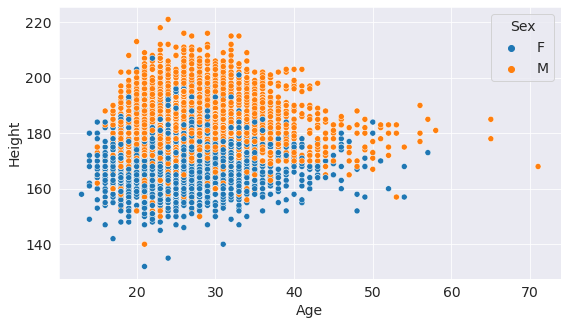

In [69]:
# Spread of Medal based on Age, Height and Weight
df1 = olympics_df[(olympics_df.Age != 0) & (olympics_df["Height (cm)"] != 0.0) & (olympics_df["Medal winner?"] != None)]
sns.scatterplot(x=df1.Age, y=df1["Height (cm)"], hue='Sex', data=df1)
plt.xlabel("Age")
plt.ylabel("Height");

In [73]:
# An interesting observation is sportsman's with height with less that 150 and age less that 20 are also winning Medals at Olympics.
# Let us see in which sport they for this medals
df1[(df1["Height (cm)"]<=150.0) & (df1.Age <=20)][['Name','Height (cm)','Age','Sport']].sort_values(['Sport'])
# With these kind of plots we can see if athletes with specific heights / ages do well in some sports...

,Name,Height (cm),Age,Sport
6047,Margaret Etim,150.0,19,Athletics
9111,Suji Kim,149.0,14,Diving
9557,Traisy Vivien Tukiet,148.0,18,Diving
10028,Yadan Hu,147.0,16,Diving
1413,Boyanka Kostova,150.0,19,Weightlifting
3710,Honami Mizuochi,148.0,19,Weightlifting
6170,Marina Sisoeva,150.0,19,Weightlifting
8902,Sirivimon Pramongkhol,142.0,17,Weightlifting


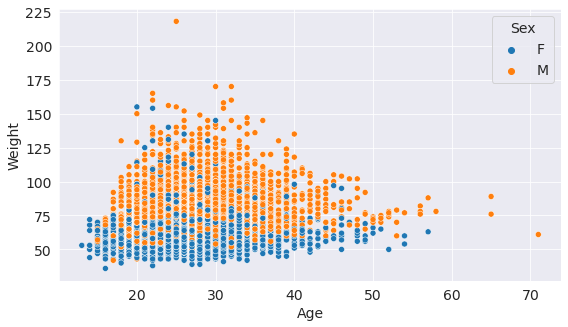

In [74]:
# Spread of Medal based on Age and Weight
df2 = olympics_df[(olympics_df.Age != 0) & (olympics_df["Weight (kg)"] != 0.0) & (olympics_df["Medal winner?"] != None)]
sns.scatterplot(x=df2.Age, y=df2["Weight (kg)"], hue='Sex', data=df2)
plt.xlabel("Age")
plt.ylabel("Weight");

In [75]:
# Let us have a look at the medalist having high weight and also the one have low weight
df2[(df2['Weight (kg)']>=170) | (df2['Weight (kg)']<=30)][['Name','Weight (kg)','Sport']]

,Name,Weight (kg),Sport
4226,Janusz Wojnarowicz,170.0,Judo
8024,Ricardo Blas Jr,218.0,Judo
9705,Velichko Cholakov,170.0,Weightlifting


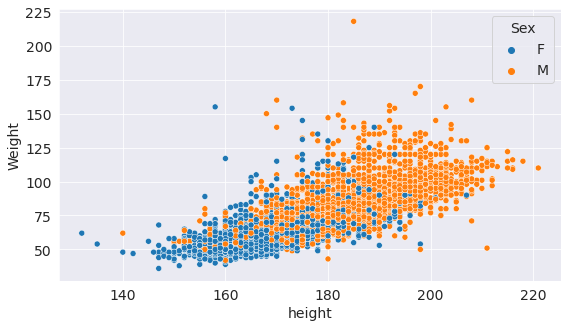

In [76]:
# Height and weight
df3 = olympics_df[(olympics_df.Age != 0) & (olympics_df["Weight (kg)"] != 0.0) & (olympics_df["Height (cm)"] != 0.0) & (olympics_df["Medal winner?"] != None)]
sns.scatterplot(x=df3["Height (cm)"], y=df3["Weight (kg)"], hue='Sex', data=df3)
plt.xlabel("height")
plt.ylabel("Weight");

In [78]:
# Let us evaluate the athletes having high weight
df3[(df3["Weight (kg)"]>160)]

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group
1253,Behdad Salimikordasiabi,Islamic Republic of Iran,22,197.0,165.0,M,12/08/1989,Weightlifting,Men's +105kg,YES,1,NaN,NaN,"(0, 29]",42.515911,Obese
4226,Janusz Wojnarowicz,Poland,32,198.0,170.0,M,4/14/1980,Judo,Men's +100kg,NaN,NaN,NaN,NaN,"(29, 45]",43.362922,Obese
8024,Ricardo Blas Jr,Guam,25,185.0,218.0,M,10/19/1986,Judo,Men's +100kg,NaN,NaN,NaN,NaN,"(0, 29]",63.696129,Obese
9705,Velichko Cholakov,Azerbaijan,30,198.0,170.0,M,01/12/1982,Weightlifting,Men's +105kg,NaN,NaN,NaN,NaN,"(29, 45]",43.362922,Obese


In [79]:
# Medal won Individual with Age more than 50
df_medal_holders = olympics_df[(olympics_df["Medal winner?"] != None)]
df_medal_holders['Count_Of_Medals'] = 1

df_medal_holders_above50 = df_medal_holders[olympics_df.Age >= 50]
df_medal_holders_above50.head(10)

,Name,Country,Age,Height (cm),Weight (kg),Sex,Date of birth,Sport,Event,Medal winner?,Gold,Silver,Bronze,Age Group,bmi,bmi group,Count_Of_Medals
121,Afanasijs Kuzmins,Latvia,65,178.0,89.0,M,3/22/1947,Shooting,Men's 25m Rapid Fire Pistol,NaN,NaN,NaN,NaN,"(60, 100]",28.089888,Overweight,1
712,Andrei Kavalenka,Belarus,57,185.0,88.0,M,03/09/1955,Shooting,Men's Trap,NaN,NaN,NaN,NaN,"(45, 60]",25.712199,Overweight,1
745,Andrew Hoy,Australia,53,157.0,60.0,M,02/08/1959,Equestrian,Individual Eventing; Team Eventing; RUTHERGLEN,NaN,NaN,NaN,NaN,"(45, 60]",24.341758,Average,1
750,Andrew Nicholson,New Zealand,51,182.0,75.0,M,08/01/1961,Equestrian,Individual Eventing; Team Eventing; NEREO,YES,NaN,NaN,0.2,"(45, 60]",22.642193,Average,1
893,Anne van Olst,Denmark,50,184.0,74.0,F,3/25/1962,Equestrian,Individual Dressage; Team Dressage; CLEARWATER,NaN,NaN,NaN,NaN,"(45, 60]",21.857278,Average,1
1558,Carl Bouckaert,Belgium,58,181.0,78.0,M,4/19/1954,Equestrian,Individual Eventing; Team Eventing; CYRANO Z,NaN,NaN,NaN,NaN,"(45, 60]",23.808797,Average,1
3689,Hiroshi Hoketsu,Japan,71,168.0,61.0,M,3/28/1941,Equestrian,Individual Dressage; WHISPER,NaN,NaN,NaN,NaN,"(60, 100]",21.612812,Average,1
3801,Ian Millar,Canada,65,185.0,76.0,M,01/06/1947,Equestrian,Individual Jumping; Team Jumping; STAR POWER,NaN,NaN,NaN,NaN,"(60, 100]",22.205990,Average,1
3931,Irada Ashumova,Azerbaijan,54,157.0,60.0,F,2/25/1958,Shooting,Women's 10m Air Pistol; Women's 25m Pistol,NaN,NaN,NaN,NaN,"(45, 60]",24.341758,Average,1
4116,Jaime Azcarraga,Mexico,52,180.0,74.0,M,09/09/1959,Equestrian,Individual Jumping; Team Jumping; GANGSTER,NaN,NaN,NaN,NaN,"(45, 60]",22.839506,Average,1


In [81]:
df_medal_holders_above50_list = df_medal_holders_above50.groupby(['Sport']).sum().sort_values('Count_Of_Medals', ascending=False).drop(['Bronze', 'bmi', 'Age','Height (cm)','Weight (kg)'], axis = 1)
df_medal_holders_above50_reset_index = df_medal_holders_above50_list.reset_index()
df_medal_holders_above50_reset_index.head()

,Sport,Count_Of_Medals
0,Equestrian,24
1,Shooting,5
2,Rowing,1
3,Table Tennis,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


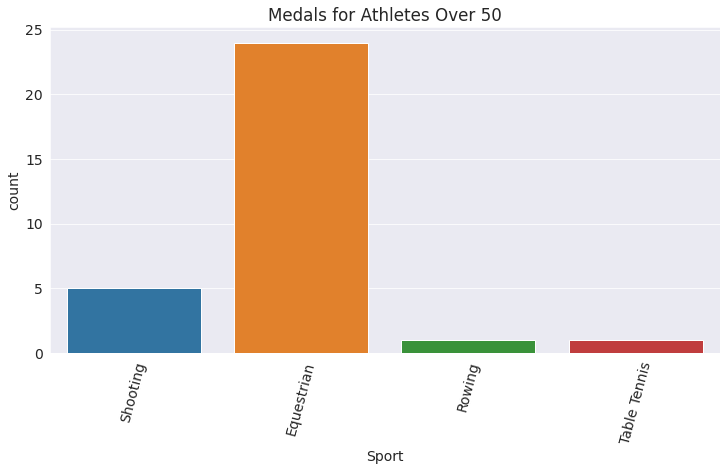

In [83]:
# Individuals above 50 have been doing in Equestrianism, Shooting, Rowing, Table Tennis
# These sports might require more mental strength then physical strength?
plt.figure(figsize=(12, 6))
plt.tight_layout()
sns.countplot(df_medal_holders_above50['Sport'])
plt.title('Medals for Athletes Over 50')
plt.xticks(rotation=75);

#https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts

Text(0.5, 1.0, 'Age vs. Height')

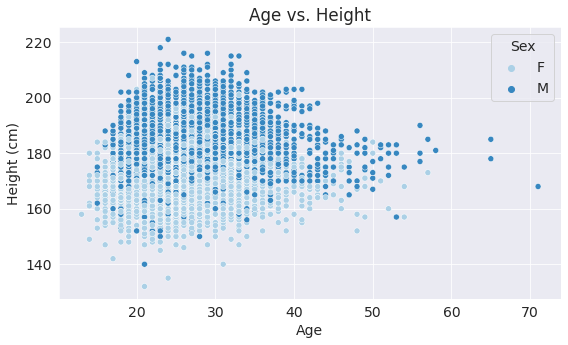

In [84]:
import seaborn as sns
sns.scatterplot(x='Age', y='Height (cm)', hue='Sex', data=olympics_df, palette='Blues')
plt.title('Age vs. Height')

Text(0.5, 1.0, 'Age vs. Height')

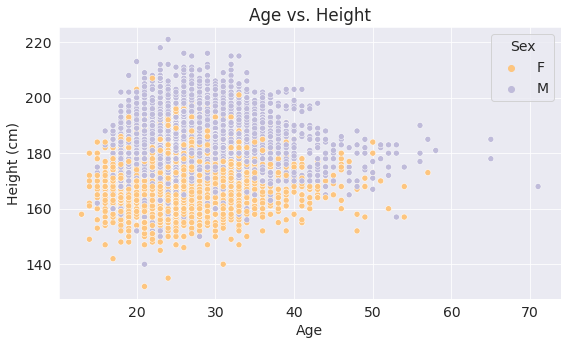

In [85]:
sns.scatterplot(x='Age', y='Height (cm)', hue='Sex', data=olympics_df, palette='PuOr')
plt.title('Age vs. Height')

Text(0.5, 1.0, 'Age vs. Height')

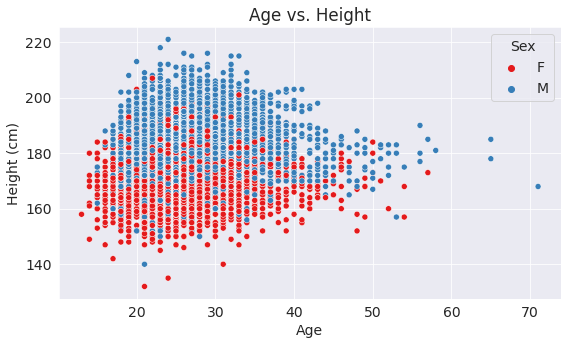

In [86]:
# using discrete color scheme
sns.scatterplot(x='Age', y='Height (cm)', hue='Sex', data=olympics_df, palette='Set1')
plt.title('Age vs. Height')

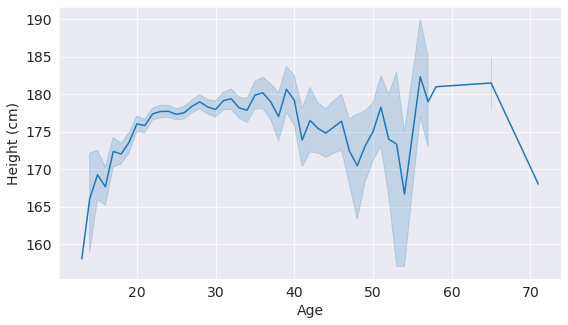

In [87]:
sns.lineplot(x='Age', y='Height (cm)', data=olympics_df)

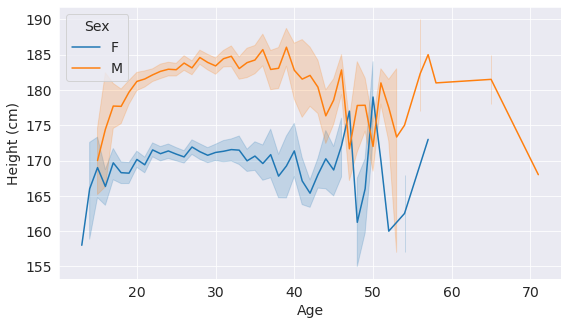

In [88]:
sns.lineplot(x='Age', y='Height (cm)', data=olympics_df, hue='Sex')

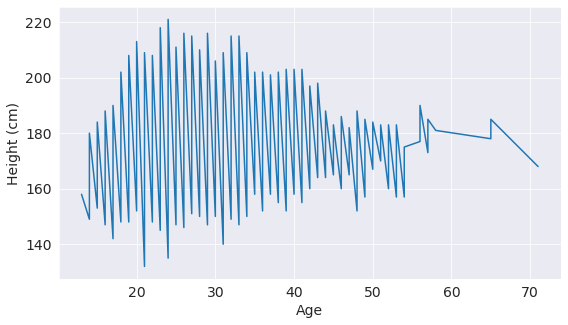

In [89]:
sns.lineplot(x='Age', y='Height (cm)', data=olympics_df, estimator=None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


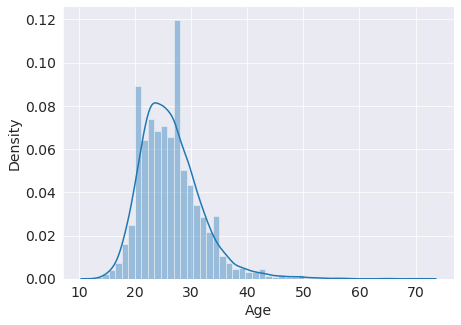

In [90]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(olympics_df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


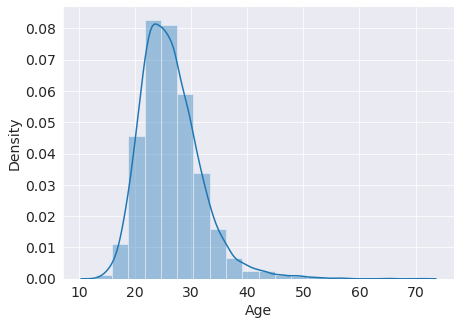

In [91]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(olympics_df['Age'], bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


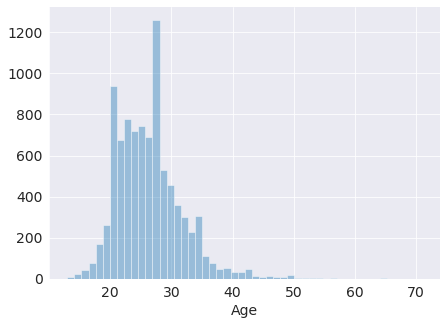

In [92]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(olympics_df['Age'], kde=False)

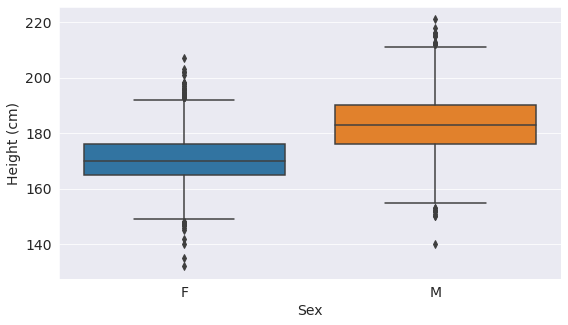

In [93]:
sns.boxplot(x=olympics_df['Sex'], y=olympics_df['Height (cm)'])
plt.show()

#https://www.kaggle.com/code/marcogdepinto/let-s-discover-more-about-the-olympic-games

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Gold Medals')

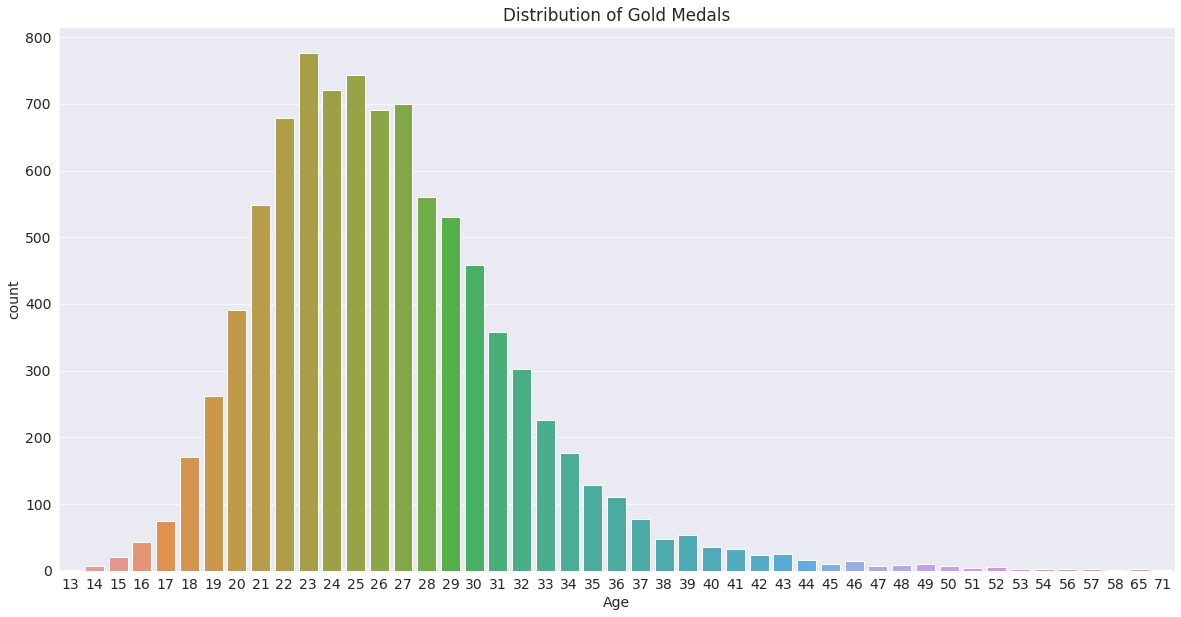

In [94]:
import seaborn as sns
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(olympics_df['Age'])
plt.title('Distribution of Gold Medals')

24


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

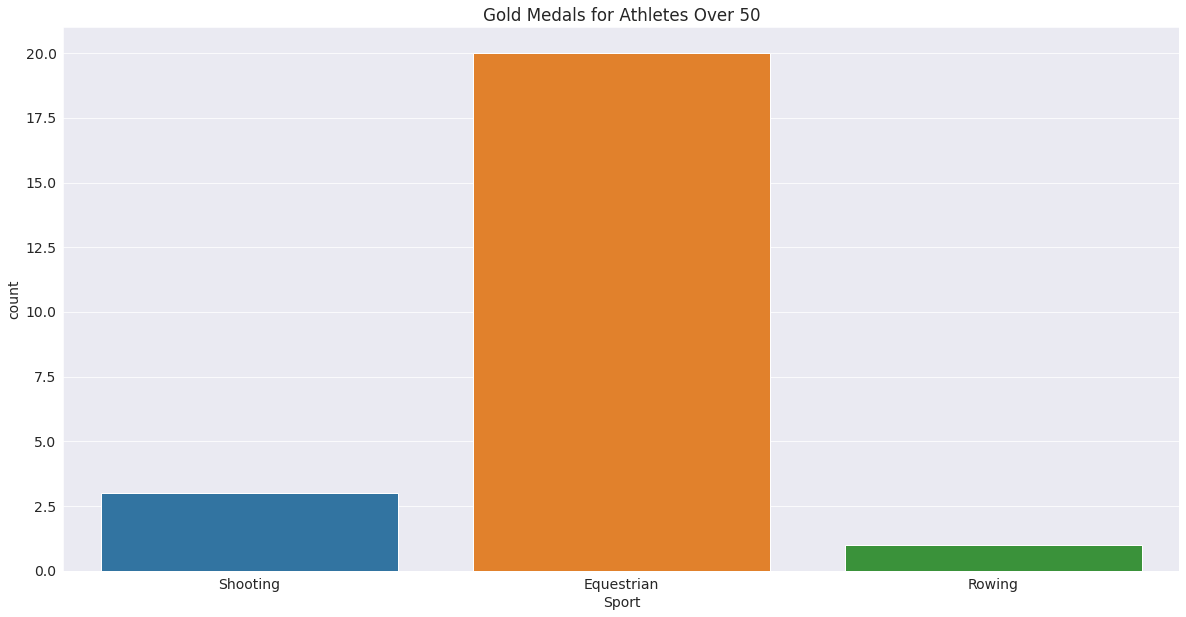

In [95]:
# It seems that we have people with Age greater that 50 with a gold medal: Let's know more about those people!
print(olympics_df['Name'][olympics_df['Age'] > 50].count())

# We will now create a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it.
masterDisciplines = olympics_df['Sport'][olympics_df['Age'] > 50]

plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

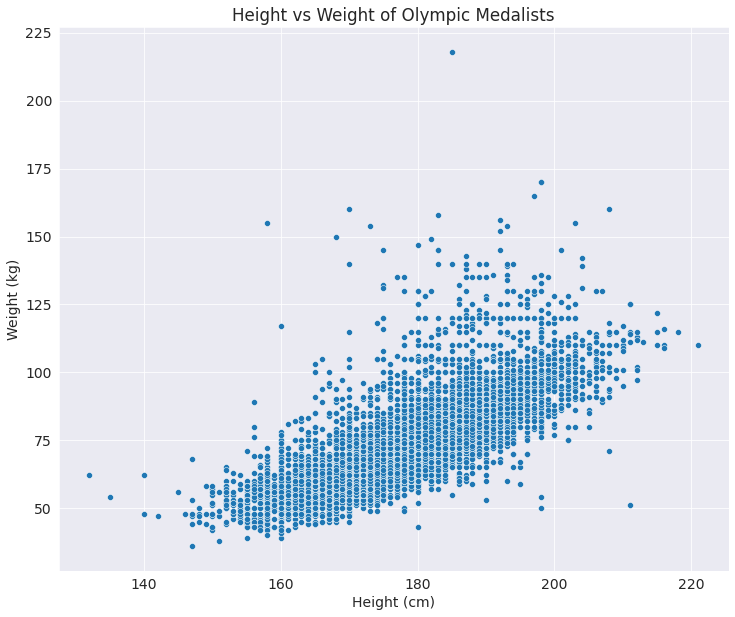

In [96]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height (cm)", y="Weight (kg)", data=olympics_df)
plt.title('Height vs Weight of Olympic Medalists')

There's more interesting plots from https://www.kaggle.com/code/marcogdepinto/let-s-discover-more-about-the-olympic-games
But they require an olympics dataset with time (Year variable)...